In [1]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator
import math

# 100 patients, default values

In [18]:
command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100"]
output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
lines_100_patients = output_100_patients.stdout.splitlines()
df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
df_100_patients = df_100_patients.iloc[1:]
df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [3]:
df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,23.340,782.180,8809.411
3,0,2.0,23.450,1465.950,4544.939
4,0,3.0,14.455,2061.161,2601.263
5,0,4.0,8.858,2576.749,1563.032
...,...,...,...,...,...
67196,99,667.0,0.000,113.289,0.000
67197,99,668.0,0.000,112.797,0.000
67198,99,669.0,0.000,112.308,0.000
67199,99,670.0,0.000,111.820,0.000


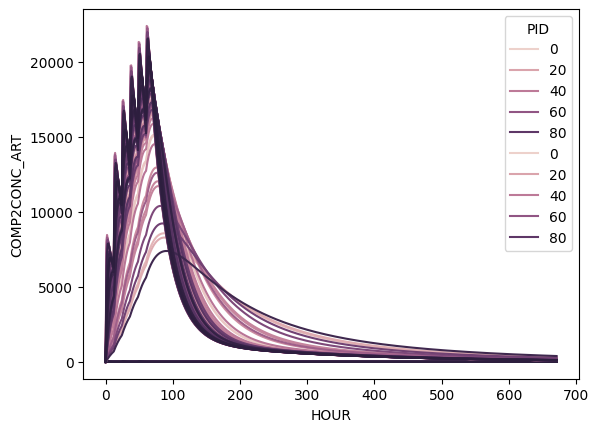

In [4]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC_ART', hue='PID', data=df_100_patients)
sns.lineplot(x='HOUR', y='COMP2CONC_LUM', hue='PID', data=df_100_patients)
plt.show()

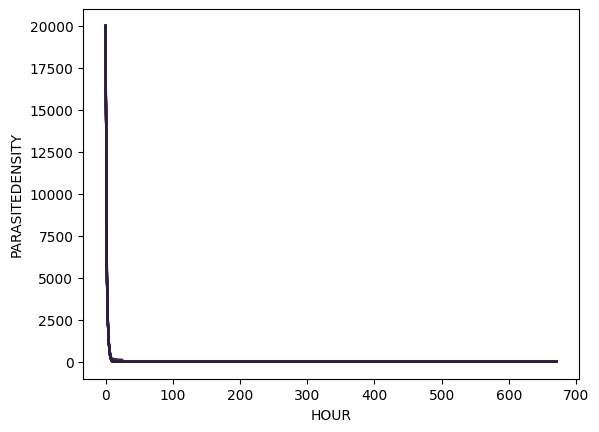

In [75]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()

In [27]:
#Converting 0s to 0.0001 to avoid log(0) error
#df_100_patients['PARASITEDENSITY'] = df_100_patients['PARASITEDENSITY'].replace(0.000, 0.0001)
#Creating new column with log(parasite density)
df_100_patients['LOG_PARASITEDENSITY'] = np.log(df_100_patients['PARASITEDENSITY'] + 0.00001)
df_100_patients_14days = df_100_patients[df_100_patients['HOUR'] < 168.0]

In [28]:
df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000,9.903488
2,0,1.0,23.868,884.625,8773.449,9.079485
3,0,2.0,18.170,1647.756,4530.154,8.418511
4,0,3.0,9.069,2302.844,2593.825,7.860889
5,0,4.0,4.510,2861.941,1559.999,7.352440
...,...,...,...,...,...,...
67196,99,667.0,0.000,111.810,0.003,-5.805815
67197,99,668.0,0.000,111.324,0.003,-5.805815
67198,99,669.0,0.000,110.840,0.003,-5.805815
67199,99,670.0,0.000,110.358,0.003,-5.805815


In [29]:
df_100_patients_14days

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000,9.903488
2,0,1.0,23.868,884.625,8773.449,9.079485
3,0,2.0,18.170,1647.756,4530.154,8.418511
4,0,3.0,9.069,2302.844,2593.825,7.860889
5,0,4.0,4.510,2861.941,1559.999,7.352440
...,...,...,...,...,...,...
66692,99,163.0,0.000,1446.111,0.003,-5.805815
66693,99,164.0,0.000,1425.023,0.003,-5.805815
66694,99,165.0,0.000,1404.587,0.003,-5.805815
66695,99,166.0,0.000,1384.779,0.003,-5.805815


In [31]:
filtered_pids = df_100_patients_14days[(df_100_patients_14days['LOG_PARASITEDENSITY'] >= 2.302585093) & (df_100_patients_14days['HOUR'] == 167.0)]['PID']
filtered_pids

Series([], Name: PID, dtype: int64)

In [36]:
df_100_patients_14days[(df_100_patients_14days['HOUR'] == 167.0) & (df_100_patients_14days['LOG_PARASITEDENSITY'] >= 2.302585093)]

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY,LOG_PARASITEDENSITY,167.0
1,0,167.0,0.000,0.000,20000.000,9.903488,167.0
2,0,167.0,23.868,884.625,8773.449,9.079485,167.0
3,0,167.0,18.170,1647.756,4530.154,8.418511,167.0
4,0,167.0,9.069,2302.844,2593.825,7.860889,167.0
5,0,167.0,4.510,2861.941,1559.999,7.352440,167.0
...,...,...,...,...,...,...,...
66553,99,167.0,0.000,10084.411,67.092,4.206065,167.0
66554,99,167.0,15.521,13937.480,50.053,3.913083,167.0
66555,99,167.0,23.608,15643.021,32.366,3.477109,167.0
66556,99,167.0,14.018,16234.700,20.921,3.040754,167.0


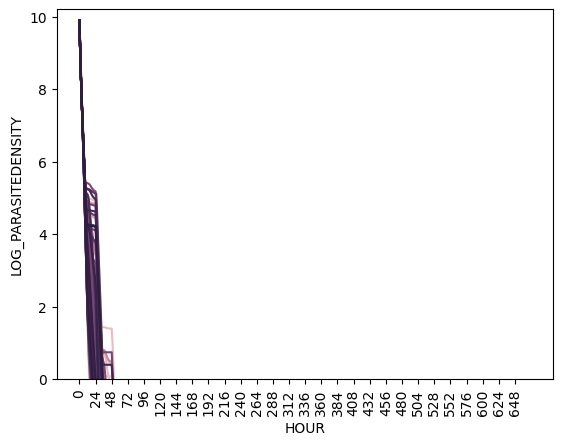

In [72]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
ax = sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
ax.set_ylim(0, 10.2)

tick_positions = range(0, int(df_100_patients['HOUR'].max()) + 1, 24)
ax.set_xticks(tick_positions)

ax.set_xticklabels(tick_positions, rotation=90)

# Hide minor ticks
ax.xaxis.set_minor_locator(plt.NullLocator())

plt.show()

# 100 patients, lumefantrine ec50 = 12 (default = 6.058522607)

In [76]:
v2_command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--ec50_lum", "12"]
v2_output_100_patients = subprocess.run(v2_command_100_patients, capture_output=True, text=True)
v2_lines_100_patients = v2_output_100_patients.stdout.splitlines()
v2_df_100_patients = pd.DataFrame([line.split(',') for line in v2_lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
v2_df_100_patients = v2_df_100_patients.iloc[1:]
v2_df_100_patients = v2_df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [77]:
v2_df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,20.450,1452.446,8599.694
3,0,2.0,23.529,2612.622,3437.765
4,0,3.0,14.224,3530.618,1503.115
5,0,4.0,8.484,4248.209,685.683
...,...,...,...,...,...
67196,99,667.0,0.000,131.423,0.000
67197,99,668.0,0.000,130.862,0.000
67198,99,669.0,0.000,130.303,0.000
67199,99,670.0,0.000,129.747,0.000


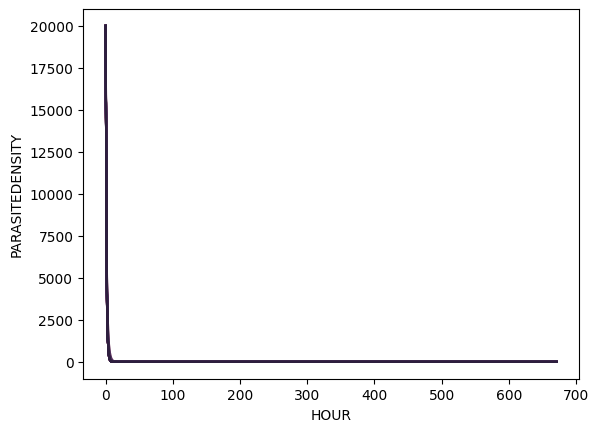

In [78]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=v2_df_100_patients, legend=False)
plt.show()

# 100 patients, ec50 lumefantrine = 12, ec50 artemisinin = 0.5

In [79]:
v3_command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--ec50_lum", "12", "--ec50_art", "0.5"]
v3_output_100_patients = subprocess.run(v3_command_100_patients, capture_output=True, text=True)
v3_lines_100_patients = v3_output_100_patients.stdout.splitlines()
v3_df_100_patients = pd.DataFrame([line.split(',') for line in v3_lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
v3_df_100_patients = v3_df_100_patients.iloc[1:]
v3_df_100_patients = v3_df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [80]:
v3_df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,21.547,2110.225,8842.318
3,0,2.0,23.407,3639.558,3546.208
4,0,3.0,14.195,4729.487,1547.008
5,0,4.0,8.523,5487.640,705.015
...,...,...,...,...,...
67196,99,667.0,-0.000,112.919,0.000
67197,99,668.0,0.000,112.429,0.000
67198,99,669.0,-0.000,111.941,0.000
67199,99,670.0,-0.000,111.455,0.000


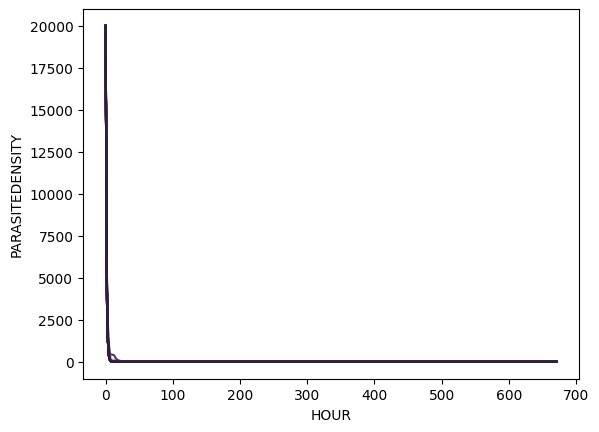

In [81]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=v3_df_100_patients, legend=False)
plt.show()

# Adjusting pmf to 2 (default 1.0)

In [93]:
v4_command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--pmf",  "2", "--ec50_lum", "12", "--ec50_art", "0.8"]
v4_output_100_patients = subprocess.run(v4_command_100_patients, capture_output=True, text=True)
v4_lines_100_patients = v4_output_100_patients.stdout.splitlines()
v4_df_100_patients = pd.DataFrame([line.split(',') for line in v4_lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
v4_df_100_patients = v4_df_100_patients.iloc[1:]
v4_df_100_patients = v4_df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [94]:
v4_df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,30.839,174.169,8576.856
3,0,2.0,20.060,338.334,3448.269
4,0,3.0,12.129,492.942,1528.937
5,0,4.0,7.333,638.426,707.127
...,...,...,...,...,...
67196,99,667.0,0.000,120.901,0.000
67197,99,668.0,0.000,120.380,0.000
67198,99,669.0,0.000,119.861,0.000
67199,99,670.0,0.000,119.344,0.000


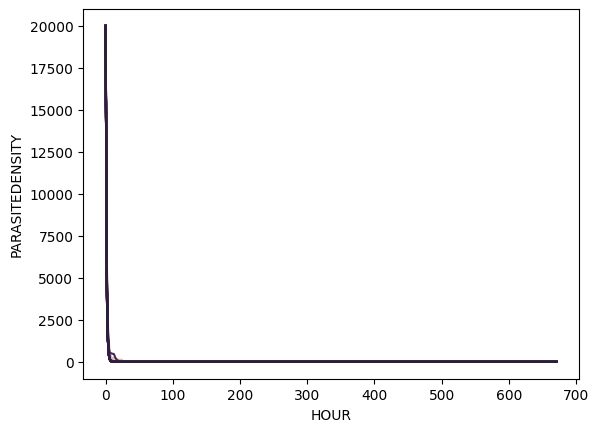

In [95]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=v4_df_100_patients, legend=False)
plt.show()

In [143]:
v4_df_100_patients_wide = v4_df_100_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
v4_df_100_patients_wide

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,...,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
1.0,8576.856,8784.359,8937.005,10492.790,8778.318,9019.596,8918.790,8900.608,9598.084,9444.159,...,8643.676,9269.714,9152.726,9080.469,9021.134,9047.051,10077.610,8929.848,8833.605,8679.111
2.0,3448.269,3608.711,3637.862,4083.218,3527.091,3635.392,3837.329,3556.768,3811.960,3797.245,...,4357.757,3961.121,3679.097,3617.360,3614.522,3605.676,4079.509,3598.705,3540.506,3497.764
3.0,1528.937,1594.913,1606.605,1786.069,1561.242,1605.481,1699.351,1573.370,1677.087,1671.236,...,2322.265,1749.739,1623.261,1598.095,1596.947,1593.332,1785.712,1590.516,1566.726,1549.239
4.0,707.127,736.559,741.758,821.309,721.544,741.255,784.236,726.952,773.075,770.480,...,1297.601,806.613,749.165,737.966,737.455,735.846,821.197,734.592,723.990,716.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
668.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
669.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [145]:
v4_df_100_patients_day14 = v4_df_100_patients_wide.loc[336.0]
v4_df_100_patients_day28 = v4_df_100_patients_wide.loc[671.0]

print(v4_df_100_patients_day14.describe())
print(v4_df_100_patients_day28.describe())

count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: 336.0, dtype: float64
count    100.00000
mean       0.00004
std        0.00040
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        0.00400
Name: 671.0, dtype: float64


In [146]:
print(v4_df_100_patients_day14[v4_df_100_patients_day14 > 100].count())
print(v4_df_100_patients_day28[v4_df_100_patients_day28 > 100].count())

0
0


# Adjusting pmax for lumefantrine and artemisinin 

In [103]:
v5_command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--pmf",  "2", "--ec50_lum", "12", "--ec50_art", "0.8", "--pmax_lum", "0.8", "--pmax_art", "0.8"]
v5_output_100_patients = subprocess.run(v5_command_100_patients, capture_output=True, text=True)
v5_lines_100_patients = v5_output_100_patients.stdout.splitlines()
v5_df_100_patients = pd.DataFrame([line.split(',') for line in v5_lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
v5_df_100_patients = v5_df_100_patients.iloc[1:]
v5_df_100_patients = v5_df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [104]:
v5_df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,6.730,917.799,10874.613
3,0,2.0,23.400,1706.123,6917.068
4,0,3.0,16.908,2379.756,4904.907
5,0,4.0,9.698,2951.889,3693.784
...,...,...,...,...,...
67196,99,667.0,0.000,127.237,0.000
67197,99,668.0,0.000,126.692,0.000
67198,99,669.0,0.000,126.149,0.000
67199,99,670.0,0.000,125.608,0.000


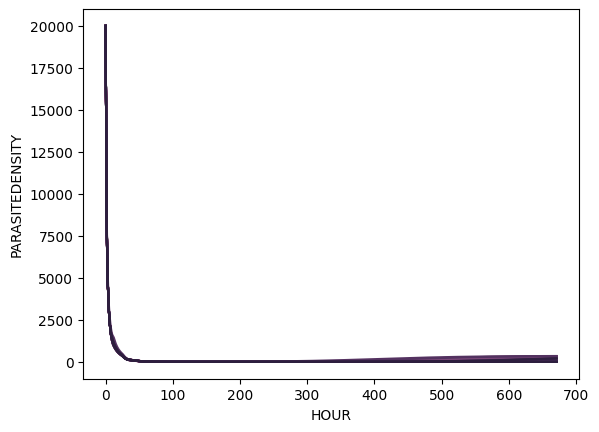

In [105]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=v5_df_100_patients, legend=False)
plt.show()

In [161]:
#Converting 0s to 0.0001 to avoid log(0) error
v5_df_100_patients['PARASITEDENSITY'] = v5_df_100_patients['PARASITEDENSITY'].replace(0.000, 0.0001)

In [185]:
#Creating new column with log(parasite density)
v5_df_100_patients['LOG_PARASITEDENSITY'] = np.log2(v5_df_100_patients['PARASITEDENSITY'])

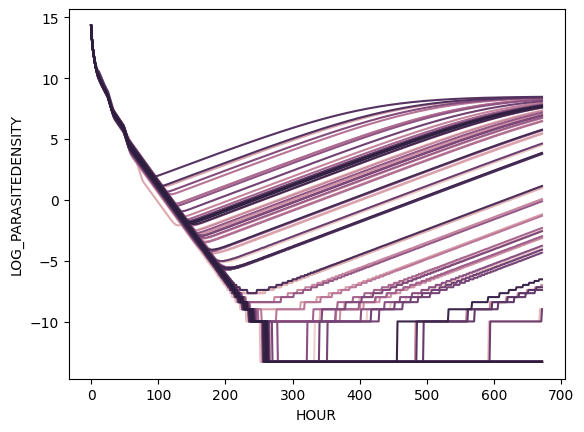

In [187]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', data=v5_df_100_patients, legend=False)
plt.show()

In [163]:
v5_df_100_patients_wide = v5_df_100_patients.pivot(index="HOUR", columns="PID", values="LOG_PARASITEDENSITY")
v5_df_100_patients_wide

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,...,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488,9.903488
1.0,9.294186,9.287049,9.290056,9.280335,9.294756,9.289423,9.283591,9.275685,9.293381,9.298678,...,9.283618,9.281194,9.289512,9.294562,9.278888,9.313427,9.286828,9.283652,9.286828,9.284716
2.0,8.841747,8.836617,8.838818,8.831783,8.842325,8.838343,8.834126,8.828439,8.841262,8.844959,...,8.834136,8.832571,8.838422,8.842013,8.830745,8.858630,8.836668,8.834162,8.836689,8.834938
3.0,8.497991,8.493889,8.495649,8.490019,8.498453,8.495270,8.491896,8.487341,8.497603,8.500558,...,8.491903,8.490651,8.495333,8.498203,8.489188,8.511462,8.493930,8.491924,8.493947,8.492546
4.0,8.214407,8.210923,8.212418,8.207636,8.214799,8.212096,8.209230,8.205359,8.214077,8.216585,...,8.209237,8.208172,8.212149,8.214587,8.206929,8.225829,8.210958,8.209255,8.210973,8.209782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,-2.796881,-9.210340,3.060021,-9.210340,5.063854,0.733329,-9.210340,-9.210340,4.748586,-6.907755,...,-9.210340,5.234674,2.622928,-4.509860,-9.210340,-9.210340,5.297452,-9.210340,5.339565,-9.210340
668.0,-2.780621,-9.210340,3.073619,-9.210340,5.071962,0.747635,-9.210340,-9.210340,4.758406,-6.214608,...,-9.210340,5.241609,2.636841,-4.509860,-9.210340,-9.210340,5.303902,-9.210340,5.345673,-9.210340
669.0,-2.764621,-9.210340,3.087171,-9.210340,5.080025,0.762207,-9.210340,-9.210340,4.768173,-6.214608,...,-9.210340,5.248497,2.650704,-4.509860,-9.210340,-9.210340,5.310305,-9.210340,5.351730,-9.210340


In [164]:
v5_df_100_patients_day14 = v5_df_100_patients_wide.loc[336.0]
v5_df_100_patients_day28 = v5_df_100_patients_wide.loc[671.0]

print(v5_df_100_patients_day14.describe())
print(v5_df_100_patients_day28.describe())

count    100.000000
mean      -4.831359
std        4.779718
min       -9.210340
25%       -9.210340
50%       -6.907755
75%        0.230101
max        4.513537
Name: 336.0, dtype: float64
count    100.000000
mean      -2.208634
std        6.254710
min       -9.210340
25%       -9.210340
50%       -2.071505
75%        4.706150
max        5.869469
Name: 671.0, dtype: float64


In [165]:
print(v5_df_100_patients_day14[v5_df_100_patients_day14 > 2.688].count())
print(v5_df_100_patients_day28[v5_df_100_patients_day28 > 2.688].count())

7
35


In [166]:
v5_df_100_patients_day28[v5_df_100_patients_day28 > 2.688]

PID
2     3.114315
4     5.095987
8     4.787583
15    3.761037
18    5.390691
20    5.841612
21    3.795557
25    4.653998
27    4.897026
31    4.806927
32    5.070011
35    5.527169
37    4.499043
38    5.728462
39    5.250681
43    5.802559
46    4.473910
47    5.727727
52    5.453516
56    4.679006
57    3.958410
59    4.973729
61    5.706273
66    5.821157
67    4.811957
69    4.797929
73    5.618718
75    3.210803
79    5.399614
83    5.869469
84    5.846762
89    3.998237
91    5.262110
96    5.322951
98    5.363698
Name: 671.0, dtype: float64

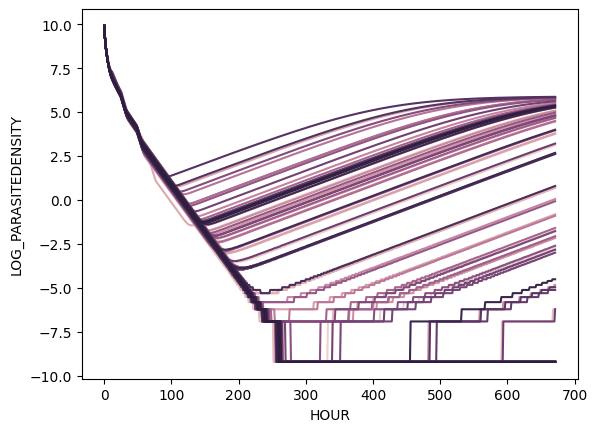

In [167]:
#Plot Parasitemia 
#Crimson - Failure, Mint Green- Success
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='LOG_PARASITEDENSITY', hue='PID', data=v5_df_100_patients, legend=False)
plt.show()

In [168]:
v6_command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "100", "--pmf",  "2", "--ec50_lum", "500", "--ec50_art", "35", "--pmax_lum", "0.8", "--pmax_art", "0.8"]
v6_output_100_patients = subprocess.run(v6_command_100_patients, capture_output=True, text=True)
v6_lines_100_patients = v6_output_100_patients.stdout.splitlines()
v6_df_100_patients = pd.DataFrame([line.split(',') for line in v6_lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
v6_df_100_patients = v6_df_100_patients.iloc[1:]
v6_df_100_patients = v6_df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [169]:
v6_df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,8.843,2608.814,11255.714
3,0,2.0,22.401,4352.971,7865.910
4,0,3.0,13.591,5490.897,6065.425
5,0,4.0,6.979,6204.725,4948.882
...,...,...,...,...,...
67196,99,667.0,0.000,125.351,362.420
67197,99,668.0,0.000,124.813,362.419
67198,99,669.0,0.000,124.277,362.419
67199,99,670.0,0.000,123.744,362.419


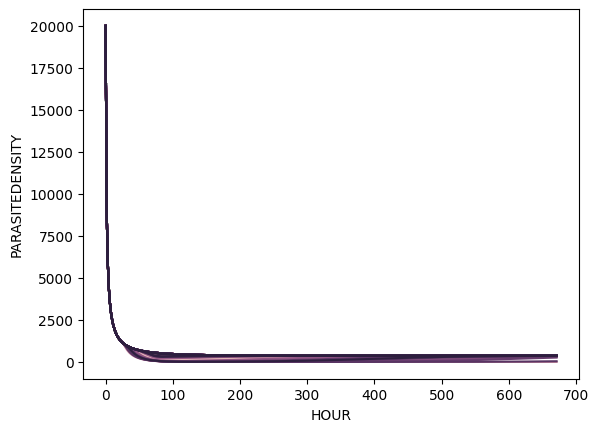

In [170]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=v6_df_100_patients, legend=False)
plt.show()

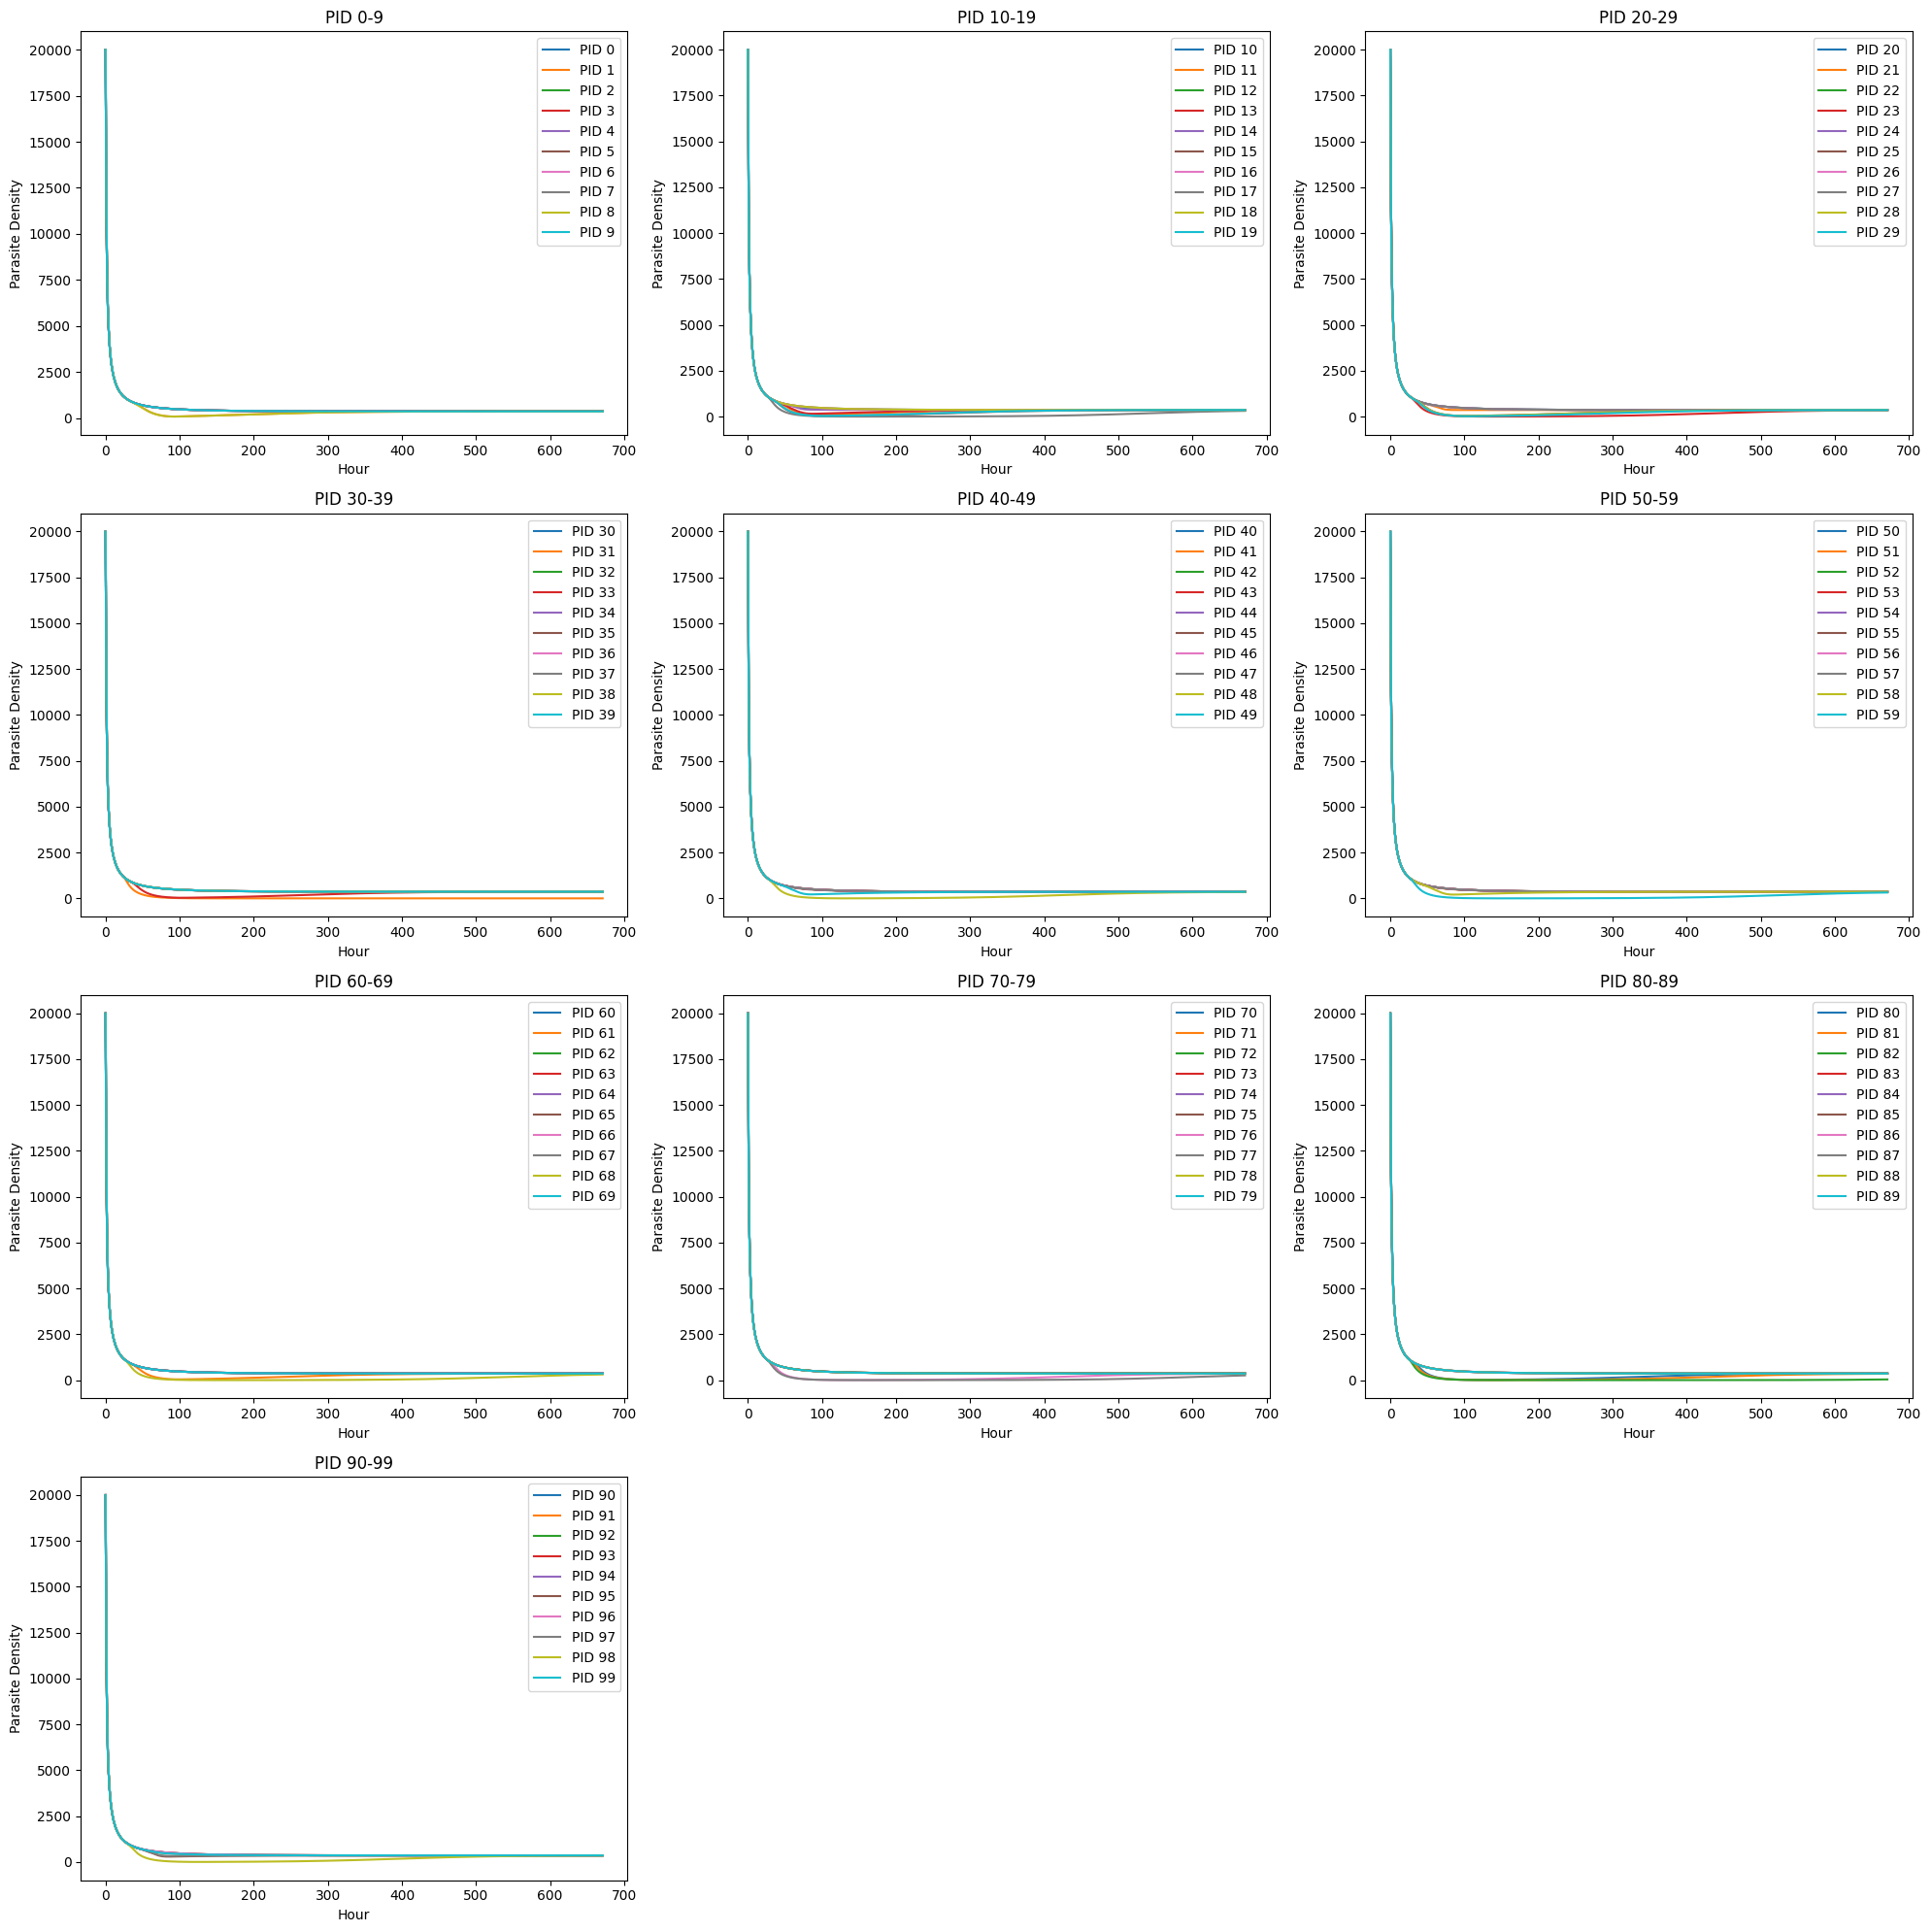

In [171]:
# Number of rows and columns for the subplot grid
nrows = 4
ncols = 3

# Create a new figure
plt.figure(figsize=(20, 20))

# Loop over each group of 10 patients
for i in range(10):
    # Calculate the PID range for this subplot
    pid_start = 10 * i
    pid_end = pid_start + 10

    # Filter DataFrame to include only patients with PID in the current range
    df_filtered = v6_df_100_patients[v6_df_100_patients['PID'].isin(range(pid_start, pid_end))]

    # Create a new subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the data for each patient in the current PID range
    for pid in df_filtered['PID'].unique():
        df_patient = df_filtered[df_filtered['PID'] == pid]
        plt.plot(df_patient['HOUR'], df_patient['PARASITEDENSITY'], label=f'PID {pid}')

    # Set the title of the subplot to the current PID range
    plt.title(f'PID {pid_start}-{pid_end-1}')
    plt.legend()  # Add a legend
    # Add labels to the x and y axes of the figure
    plt.xlabel('Hour')  # X-axis label
    plt.ylabel('Parasite Density')  # Y-axis label

# Show the plot
plt.tight_layout()
plt.show()

In [172]:
v6_df_100_patients_wide = v6_df_100_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
v6_df_100_patients_wide

v6_df_100_patients_day14 = v6_df_100_patients_wide.loc[336.0]
v6_df_100_patients_day28 = v6_df_100_patients_wide.loc[671.0]

In [173]:
v6_df_100_patients_day14[v6_df_100_patients_day14 > 100].count()

np.int64(90)

In [174]:
v6_df_100_patients_day28[v6_df_100_patients_day28 > 100].count()

np.int64(98)

# 300 patients

In [175]:
v7_command_100_patients = ["/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk", "--AL", "-n", "300", "--pmf",  "2", "--ec50_lum", "500", "--ec50_art", "35", "--pmax_lum", "0.8", "--pmax_art", "0.8"]
v7_output_100_patients = subprocess.run(v7_command_100_patients, capture_output=True, text=True)
v7_lines_100_patients = v7_output_100_patients.stdout.splitlines()
v7_df_100_patients = pd.DataFrame([line.split(',') for line in v7_lines_100_patients], columns=["PID","HOUR","COMP2CONC_ART","COMP2CONC_LUM","PARASITEDENSITY"])
v7_df_100_patients = v7_df_100_patients.iloc[1:]
v7_df_100_patients = v7_df_100_patients.apply(pd.to_numeric, errors='coerce')
    

In [176]:
v7_df_100_patients

,PID,HOUR,COMP2CONC_ART,COMP2CONC_LUM,PARASITEDENSITY
1,0,0.0,0.000,0.000,20000.000
2,0,1.0,1.885,302.558,11255.714
3,0,2.0,16.852,583.368,7865.925
4,0,3.0,20.344,843.615,6065.433
5,0,4.0,13.989,1084.427,4948.887
...,...,...,...,...,...
201596,299,667.0,0.000,110.991,362.424
201597,299,668.0,0.000,110.508,362.424
201598,299,669.0,0.000,110.027,362.424
201599,299,670.0,0.000,109.549,362.423


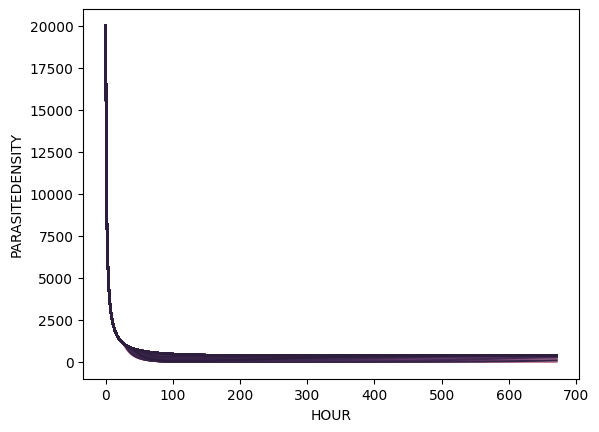

In [177]:
#Plot Parasitemia 
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=v7_df_100_patients, legend=False)
plt.show()